In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('diamonds')
print(df.shape)
df.head(10)

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=.35)

print(train_df.shape)
print(test_df.shape)

(35061, 10)
(18879, 10)


In [27]:
train_df = train_df.copy()
test_df = test_df.copy()

### EDA

In [5]:
train_df.describe()

,carat,depth,table,price,x,y,z
count,35061.000000,35061.000000,35061.000000,35061.000000,35061.000000,35061.000000,35061.000000
mean,0.796769,61.754402,57.449317,3917.639543,5.727061,5.730045,3.535693
std,0.474705,1.438080,2.239617,3984.273756,1.123639,1.123717,0.696023
min,0.200000,43.000000,50.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2395.000000,5.690000,5.700000,3.520000
75%,1.040000,62.500000,59.000000,5306.000000,6.540000,6.530000,4.030000
max,4.130000,79.000000,95.000000,18823.000000,10.140000,31.800000,6.430000


In [7]:
train_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
train_df['cut'].value_counts()

Ideal        14136
Premium       8805
Very Good     7856
Good          3208
Fair          1056
Name: cut, dtype: int64

In [32]:
CUT_ORDER = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [9]:
train_df['color'].value_counts()

G    7373
E    6295
F    6199
H    5423
D    4430
I    3490
J    1851
Name: color, dtype: int64

In [33]:
COLOR_ORDER = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [10]:
train_df['clarity'].value_counts()

SI1     8434
VS2     8018
SI2     6001
VS1     5299
VVS2    3269
VVS1    2372
IF      1171
I1       497
Name: clarity, dtype: int64

In [34]:
CLARITY_ORDER = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

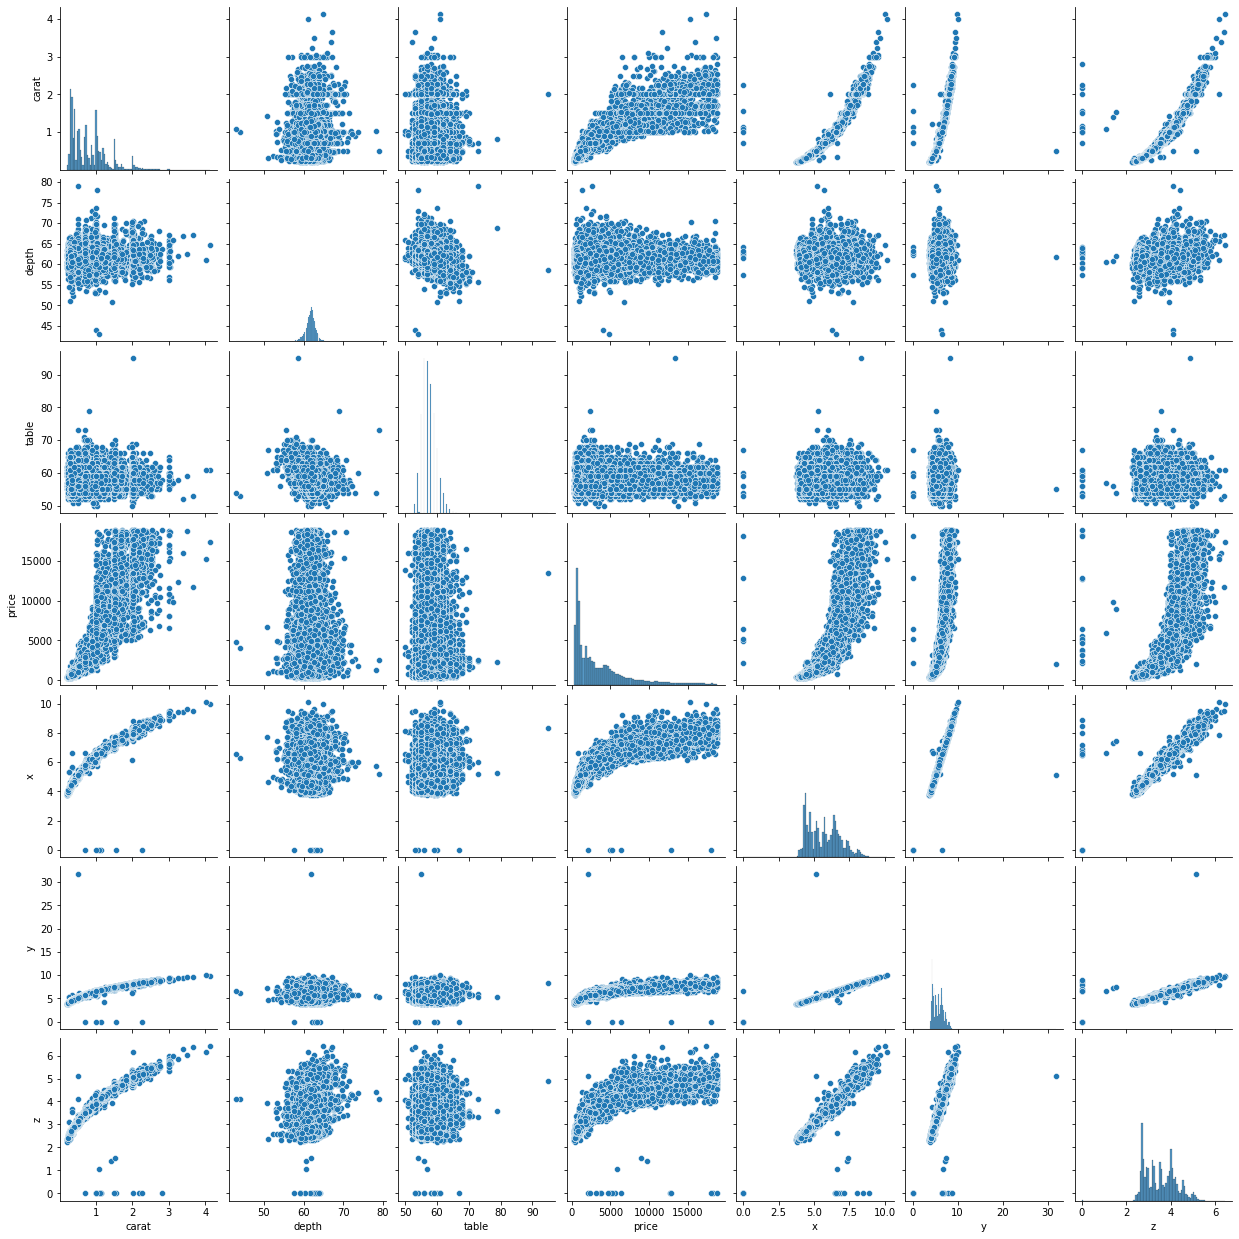

In [12]:
sns.pairplot(train_df, vars=['carat', 'depth', 'table', 'price', 'x', 'y', 'z'])
plt.show()

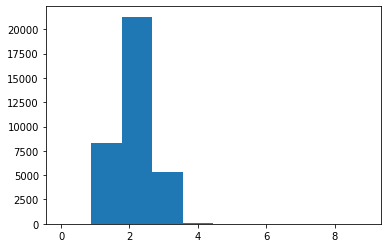

In [17]:
# plt.hist(train_df['x'] - train_df['y'])
# plt.hist(train_df['y'] - train_df['z'])
plt.hist(train_df['x'] - train_df['z'])
plt.show()

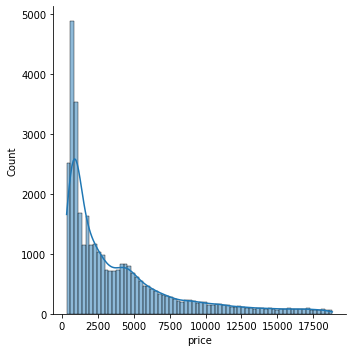

In [23]:
sns.displot(data=train_df, x='price', kde=True)
plt.show()

In [28]:
train_df['log_price'] = np.log(train_df['price'])

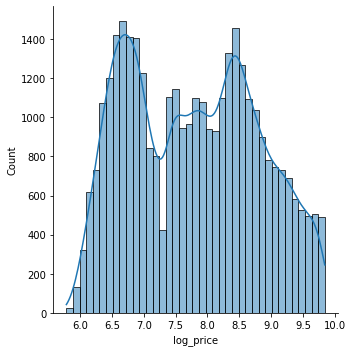

In [29]:
sns.displot(data=train_df, x='log_price', kde=True)
plt.show()

In [38]:
train_df['log_carat'] = np.log(train_df['carat'])

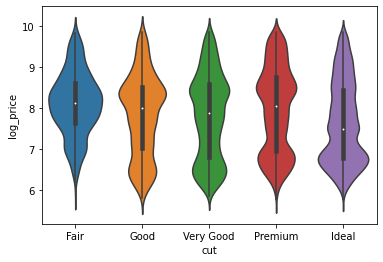

In [35]:
sns.violinplot(data=train_df, x='cut', y='log_price', order=CUT_ORDER)
plt.show()

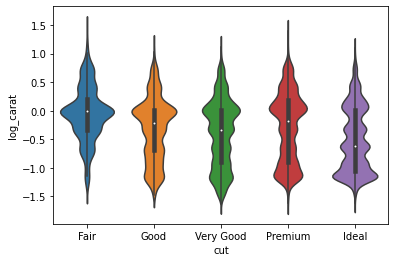

In [39]:
sns.violinplot(data=train_df, x='cut', y='log_carat', order=CUT_ORDER)
plt.show()

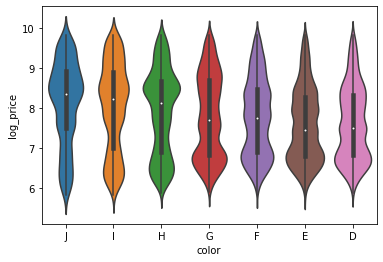

In [40]:
sns.violinplot(data=train_df, x='color', y='log_price', order=COLOR_ORDER)
plt.show()

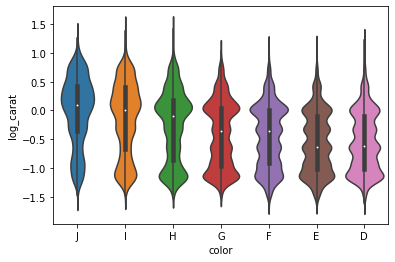

In [41]:
sns.violinplot(data=train_df, x='color', y='log_carat', order=COLOR_ORDER)
plt.show()

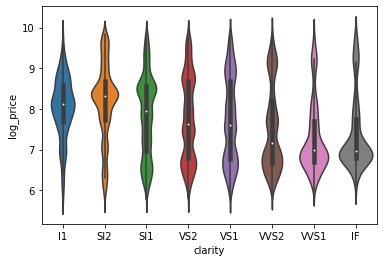

In [42]:
sns.violinplot(data=train_df, x='clarity', y='log_price', order=CLARITY_ORDER)
plt.show()

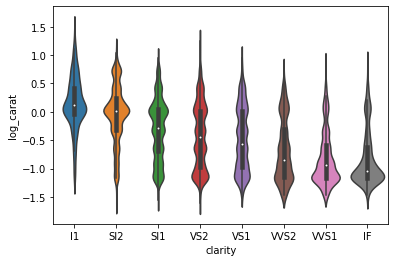

In [43]:
sns.violinplot(data=train_df, x='clarity', y='log_carat', order=CLARITY_ORDER)
plt.show()

In [62]:
def encode_cut(cut_value):
    return CUT_ORDER.index(cut_value) + 1

In [67]:
train_df['cut_encoding'] = train_df['cut'].apply(encode_cut)

In [73]:
def encode_color(color_value):
    return COLOR_ORDER.index(color_value) + 1


def encode_clarity(clarity_value):
    return CLARITY_ORDER.index(clarity_value) + 1


train_df['color_encoding'] = train_df['color'].apply(encode_color)
train_df['clarity_encoding'] = train_df['clarity'].apply(encode_clarity)

In [77]:
train_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat,cut_encoding,color_encoding,clarity_encoding
24279,1.72,Premium,I,VVS2,62.7,58.0,12509,7.60,7.54,4.75,9.434204,0.542324,4,2,6
40354,0.43,Premium,F,VS1,62.5,58.0,1129,4.85,4.78,3.01,7.029088,-0.843970,4,5,5
34208,0.33,Premium,F,VS2,62.4,58.0,854,4.41,4.37,2.74,6.749931,-1.108663,4,5,4
13713,0.30,Ideal,E,VS2,62.3,56.0,603,4.27,4.30,2.67,6.401917,-1.203973,5,6,4
30087,0.32,Premium,H,VS1,60.2,58.0,720,4.47,4.43,2.68,6.579251,-1.139434,4,3,5


In [75]:
import umap

In [76]:
umap_reducer = umap.UMAP(n_components=2)

In [84]:
INPUT_FEATURES = ['log_carat', 'depth', 'table', 'x', 'y', 'z', 'cut_encoding', 'color_encoding', 'clarity_encoding']

In [78]:
train_embedding = umap_reducer.fit_transform(train_df[INPUT_FEATURES])

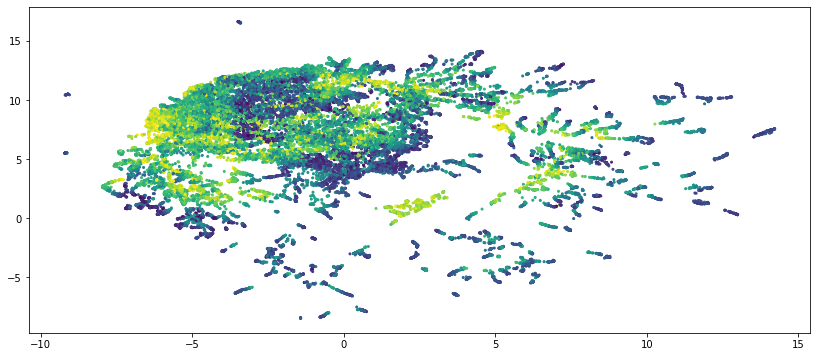

In [82]:
plt.figure(figsize=(14, 6))
plt.scatter(train_embedding[:, 0], train_embedding[:, 1], s=4, c=train_df['log_price'])
plt.show()

### Baseline model

In [83]:
train_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat,cut_encoding,color_encoding,clarity_encoding
24279,1.72,Premium,I,VVS2,62.7,58.0,12509,7.60,7.54,4.75,9.434204,0.542324,4,2,6
40354,0.43,Premium,F,VS1,62.5,58.0,1129,4.85,4.78,3.01,7.029088,-0.843970,4,5,5
34208,0.33,Premium,F,VS2,62.4,58.0,854,4.41,4.37,2.74,6.749931,-1.108663,4,5,4
13713,0.30,Ideal,E,VS2,62.3,56.0,603,4.27,4.30,2.67,6.401917,-1.203973,5,6,4
30087,0.32,Premium,H,VS1,60.2,58.0,720,4.47,4.43,2.68,6.579251,-1.139434,4,3,5


In [85]:
X_train = train_df[INPUT_FEATURES]
y_train = train_df['price']

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
model = DecisionTreeRegressor(max_depth=10)

In [112]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [130]:
def mape(y_true, y_pred):
    return np.mean(np.abs(y_true.values - y_pred) / y_true.values)

In [114]:
y_train_pred = model.predict(X_train)

In [132]:
print('Train performance: MSE:', mean_squared_error(y_train, y_train_pred),
      'MAE:', mean_absolute_error(y_train, y_train_pred),
      'MAPE:', mape(y_train, y_train_pred))

Train performance: MSE: 269509.78744416765 MAE: 283.8441140505227 MAPE: 0.08385302849821047


In [93]:
test_df['log_carat'] = np.log(test_df['carat'])
test_df['cut_encoding'] = test_df['cut'].apply(encode_cut)
test_df['color_encoding'] = test_df['color'].apply(encode_color)
test_df['clarity_encoding'] = test_df['clarity'].apply(encode_clarity)

In [116]:
X_test = test_df[INPUT_FEATURES]
y_test = test_df['price']

In [117]:
y_test_pred = model.predict(X_test)

In [133]:
print('Test performance: MSE:', mean_squared_error(y_test, y_test_pred),
      'MAE:', mean_absolute_error(y_test, y_test_pred),
      'MAPE:', mape(y_test, y_test_pred))

Test performance: MSE: 392304.3604563524 MAE: 337.7892592815728 MAPE: 0.0941012436192248


In [142]:
train_df['xyz'] = train_df['x'] * train_df['y'] * train_df['z']
test_df['xyz'] = test_df['x'] * test_df['y'] * test_df['z']

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
from xgboost import XGBRegressor

In [137]:
from sklearn.pipeline import Pipeline

In [139]:
model = Pipeline(steps=[
    ('scaling', StandardScaler()),
    ('regression', XGBRegressor())
])

In [143]:
X_train = train_df[INPUT_FEATURES + ['xyz']]
X_test = test_df[INPUT_FEATURES + ['xyz']]

In [140]:
log_y_train = train_df['log_price']

In [144]:
model.fit(X_train, log_y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('regression',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=12, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [145]:
log_y_train_pred = model.predict(X_train)
y_train_pred = np.exp(log_y_train_pred)

In [146]:
print('Train performance: MSE:', mean_squared_error(y_train, y_train_pred),
      'MAE:', mean_absolute_error(y_train, y_train_pred),
      'MAPE:', mape(y_train, y_train_pred))

Train performance: MSE: 179917.54330261776 MAE: 224.28766161338535 MAPE: 0.05465059280994417


In [147]:
log_y_test_pred = model.predict(X_test)
y_test_pred = np.exp(log_y_test_pred)

In [148]:
print('Test performance: MSE:', mean_squared_error(y_test, y_test_pred),
      'MAE:', mean_absolute_error(y_test, y_test_pred),
      'MAPE:', mape(y_test, y_test_pred))

Test performance: MSE: 296654.5752485243 MAE: 274.32876614232623 MAPE: 0.06442774171866203


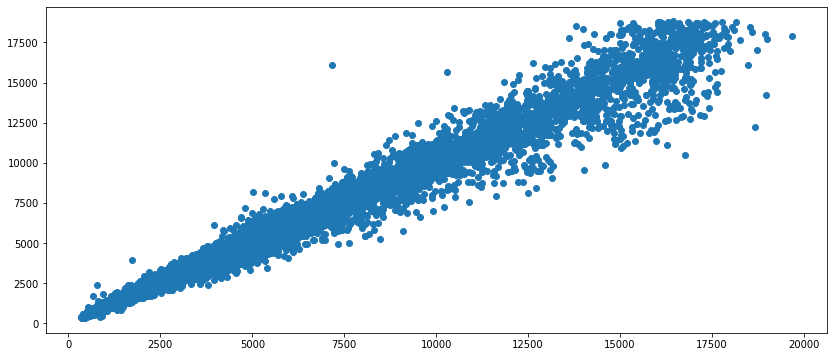

In [150]:
plt.figure(figsize=(14, 6))
plt.scatter(y_test_pred, y_test)
plt.show()

In [151]:
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

In [152]:
perm = PermutationImportance(model).fit(X_test, y_test)

In [154]:
show_weights(perm, feature_names=X_train.columns.tolist())

Weight,Feature
0.0002 ± 0.0000,log_carat
0.0001 ± 0.0000,y
0.0000 ± 0.0000,z
0.0000 ± 0.0000,xyz
0.0000 ± 0.0000,table
-0.0000 ± 0.0000,depth
-0.0000 ± 0.0000,cut_encoding
-0.0000 ± 0.0000,clarity_encoding
-0.0000 ± 0.0000,color_encoding
-0.0000 ± 0.0000,x


In [155]:
import shap
shap.initjs()

In [159]:
medians = X_train.median().values.reshape((1, -1))
explainer = shap.KernelExplainer(lambda x: model.predict(x), medians)

In [160]:
shap_values = explainer.shap_values(X_test, nsamples=1000)

  0%|          | 0/18879 [00:00<?, ?it/s]

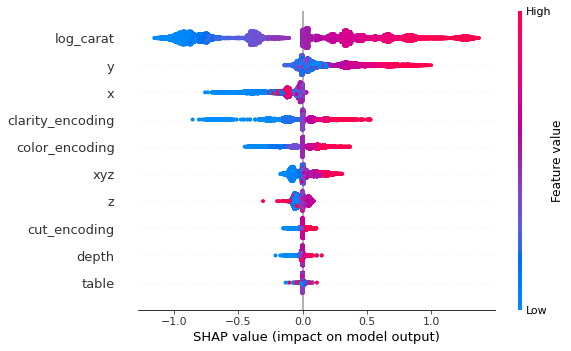

In [163]:
shap.summary_plot(shap_values, X_test)

#### Other things to try:
* Other models (e.g. logistic regression, KNN, etc.)
* Ensembles of models
* Hyperparameter tuning
* More feature engineering
    * PCA + Polynomial features
* Feature selection

In [164]:
foo = np.random.random(size=(100, 7))

In [167]:
foo_df = pd.DataFrame(data=foo, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [168]:
foo_df_train, foo_df_test = train_test_split(foo_df)